# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 2

In [ ]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline


In [ ]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")


In [83]:
df


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld,brands
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11,Golf
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7,A5
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4,Jeep
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5,GOLF
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5,Skoda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313682,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Offer,0,control,Other,2005,manuell,0,...,2016-03-21 10:42:49,2016,2016,March,March,0,10,11,5,Mitsubishi
313683,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Offer,2200,test,Other,2005,Unspecified,0,...,2016-04-06 00:46:52,2016,2016,March,March,23,0,11,11,Suche
313684,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Offer,1199,test,cabrio,2000,automatik,101,...,2016-03-11 18:17:12,2016,2016,March,March,6,18,16,9,Smart
313685,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Offer,9200,test,bus,1996,manuell,102,...,2016-04-07 07:15:26,2016,2016,March,March,19,7,20,9,Volkswagen


In [ ]:
#df[['Brand','Model']] = df['name'].str.split("_")

split_data = df["name"].str.split("_").str.get(0)

data = split_data.to_list()

df['brands'] = pd.DataFrame(data)
df



## Número de veículos pertencentes a cada marca

In [27]:
# Crie um Plot que mostre o número de veículos pertencentes a cada marca
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x0000026B21C74708>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a
    :class:`FacetGrid`.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Ca

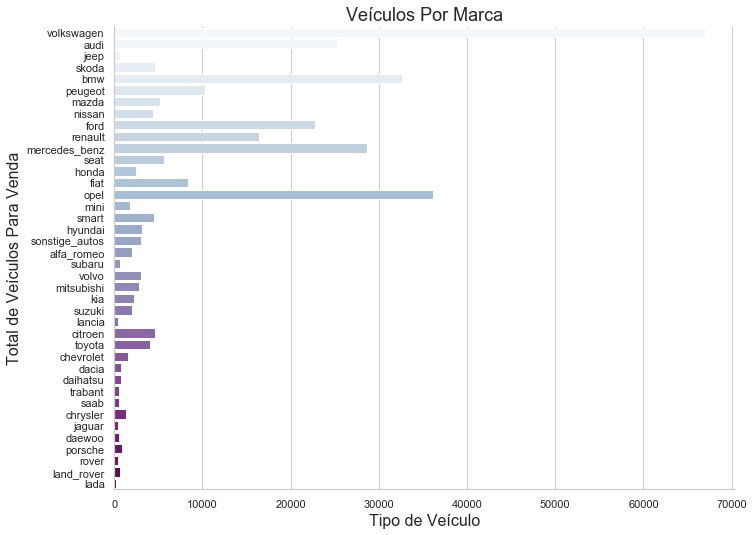

In [86]:

sns.set_style("whitegrid")
g = sns.catplot(y="brand", data=df, kind="count", palette="BuPu", height=7, aspect=1.5)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})     
g.ax.set_title("Veículos Por Marca",fontdict= {'size':18})
plt.show()

#Resposta

In [57]:
#df test
x = df['brands'].iloc[:100]

l_x = x.to_list()

type(l_x)

l_x
df_test = pd.DataFrame(l_x)
df_test

,0
0,Golf
1,A5
2,Jeep
3,GOLF
4,Skoda
...,...
95,Honda
96,530d
97,Opel
98,Opel


In [84]:
df.describe

<bound method NDFrame.describe of                 dateCrawled                                   name  seller  \
0       2016-03-24 11:52:17                             Golf_3_1.6  privat   
1       2016-03-24 10:58:45                   A5_Sportback_2.7_Tdi  privat   
2       2016-03-14 12:52:21         Jeep_Grand_Cherokee_"Overland"  privat   
3       2016-03-17 16:54:04                    GOLF_4_1_4__3TÃRER  privat   
4       2016-03-31 17:25:20         Skoda_Fabia_1.4_TDI_PD_Classic  privat   
...                     ...                                    ...     ...   
313682  2016-03-21 09:50:58                        Mitsubishi_Cold  privat   
313683  2016-03-14 17:48:27             Suche_t4___vito_ab_6_sitze  privat   
313684  2016-03-05 19:56:21  Smart_smart_leistungssteigerung_100ps  privat   
313685  2016-03-19 18:57:12     Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   
313686  2016-03-20 19:41:08                 VW_Golf_Kombi_1_9l_TDI  privat   

       offerType  price   abt

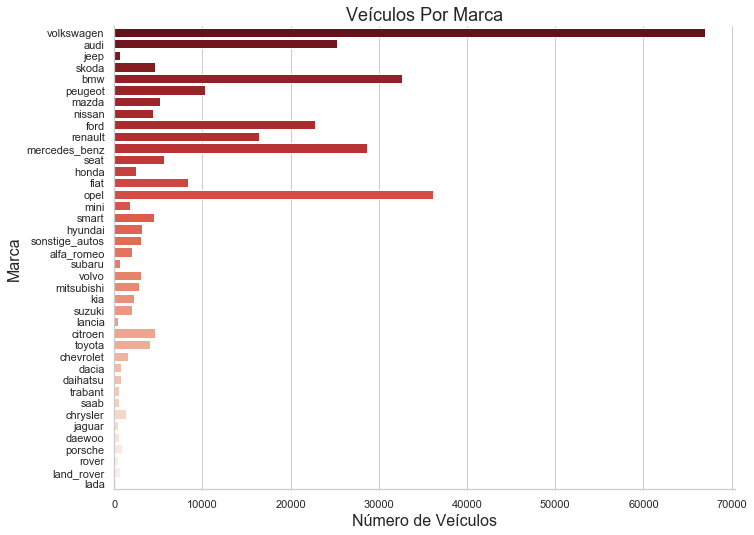

In [87]:
# Salvando o plot
g.savefig(("plots/Analise2/brand-vehicleCount.png"))

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


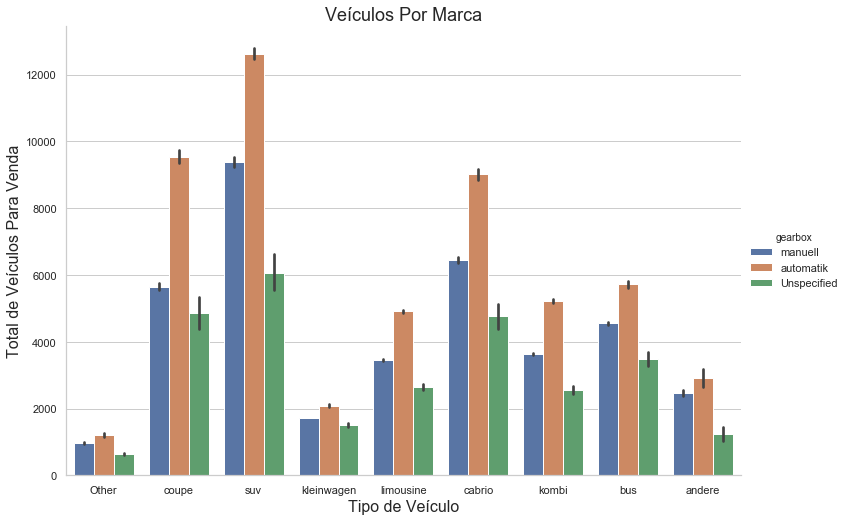

In [111]:
# Crie um Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio
#sns.set_style("whitegrid")
fig = sns.catplot(x = 'vehicleType',y="price", hue="gearbox", data=df,kind="bar", height=7, aspect=1.5)
fig.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
fig.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})     
fig.ax.set_title("Veículos Por Marca",fontdict= {'size':18})
plt.show()



In [95]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins. If unspecified, as reference rule is used
        that tries to find a useful default.
  

In [112]:
# Salvando o plot
fig.savefig("plots/Analise2/vehicletype-gearbox-price.png")

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>